<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 18, 2016: `log` $g$ poly
<br>November 16, 2016: `expt` $g$ poly and $H$ matrix
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [31]:
%run ../../src/matrix_functions.py
%run ../../src/commons.py
%run ../../src/sequences.py

# Pascal array $\mathcal{P}$

In [3]:
m=8

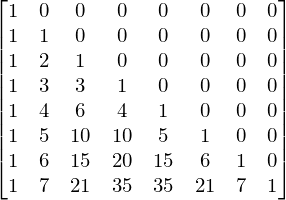

In [7]:
P = Matrix(m,m,binomial)
P

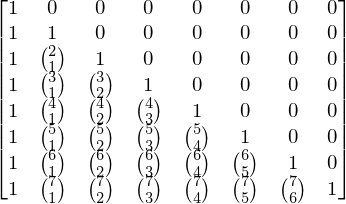

In [8]:
P_ = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P_

In [9]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
eigendata

In [10]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

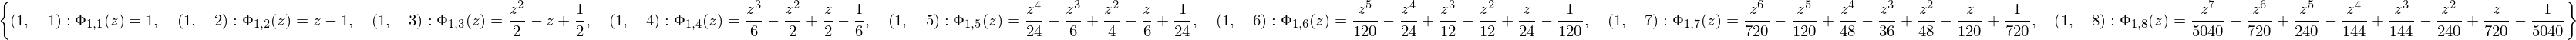

In [11]:
Phi_polynomials = component_polynomials_riordan(m)
Phi_polynomials

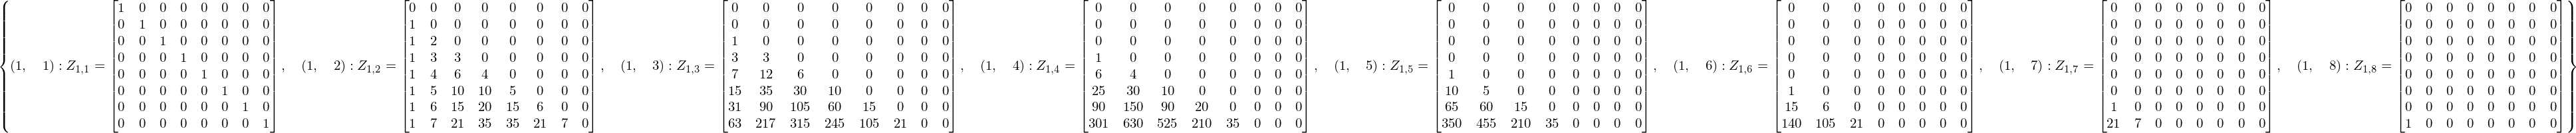

In [33]:
cmatrices = component_matrices(P, Phi_polynomials)
cmatrices

In [34]:
%run ../../src/commons.py

In [35]:
a = IndexedBase('a')
aeq = Eq(a[n], n+a[n-1])
b = Function('b')
beq = Eq(b(n), n+b(n-1))

with lift_to_Lambda(aeq, return_eq=True) as aEQ, lift_to_Lambda(beq, return_eq=True) as bEQ:
    arec = aEQ(n+1)
    brec = bEQ(n+1)
arec, brec

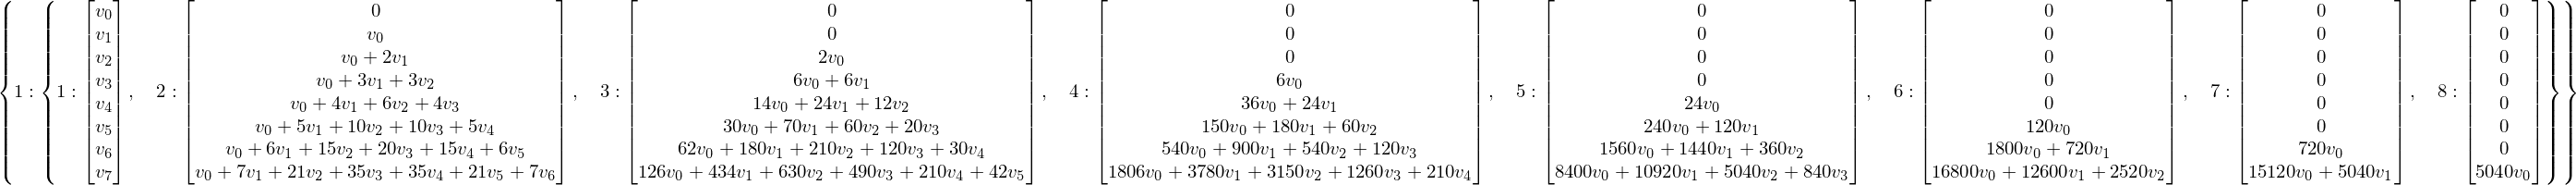

In [49]:
v = IndexedBase('v')
v_vector = Matrix(m, 1, lambda i, _: v[i])#v[i] if i else 1)
M_space = {}

for (i, j), v in cmatrices.items():
    
    cmatrices.setdefault((i,2), zeros(m, m))
    
    if i not in M_space: 
        M_space[i] = {}
        
    Z_i1, Z_i2 = cmatrices[i,1].rhs, cmatrices[i,2].rhs
    
    x_ij = Z_i2**(j-1) * Z_i1 * v_vector
    
    M_space[i][j] = x_ij
    
M_space

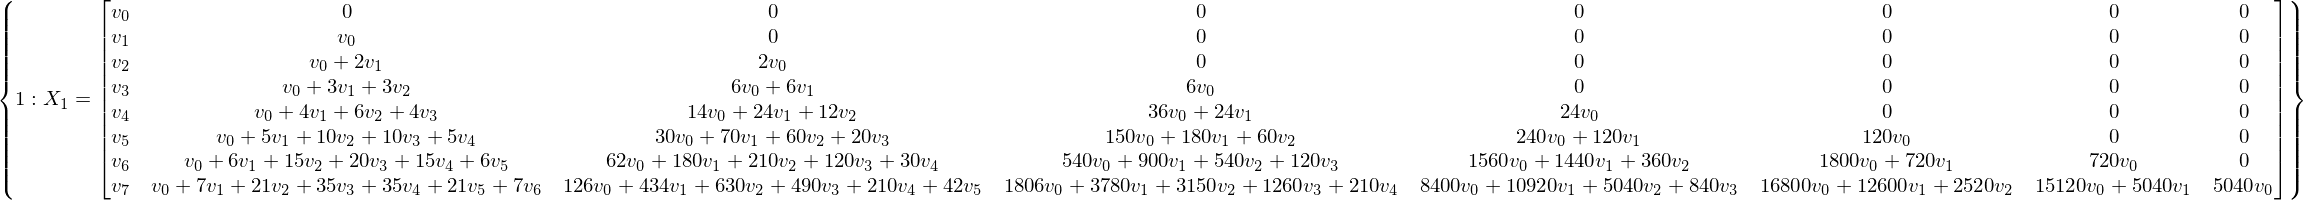

In [72]:
def generalized_eigenvectors(M_space):
    Xs = {}
    X = IndexedBase('X')
    for i, M_i in M_space.items():
        
        X_i = Matrix(m, m, lambda n, k: M_i[k+1][n, 0])
        Xs[i] = Eq(X[i],X_i, evaluate=False)

    return Xs

GEs = generalized_eigenvectors(M_space)
GEs

In [62]:
eqs = {}
for i, (lamda, m_lambda) in data.items():
    eig, mul = eigenvals[lamda], multiplicities[m_lambda]
    Jordan_chain = M_space[i]
    eqs[i] = {}
    
    for j in range(1, mul):
        x_ij, x_i_succj = Jordan_chain[j], Jordan_chain[j+1]
        eqs[i][j] = Eq(P*x_ij, eig*x_ij + x_i_succj)
    
    x_i_mul = Jordan_chain[mul]
    eqs[i][mul] = Eq(P*x_i_mul, eig*x_i_mul)
        
eqs

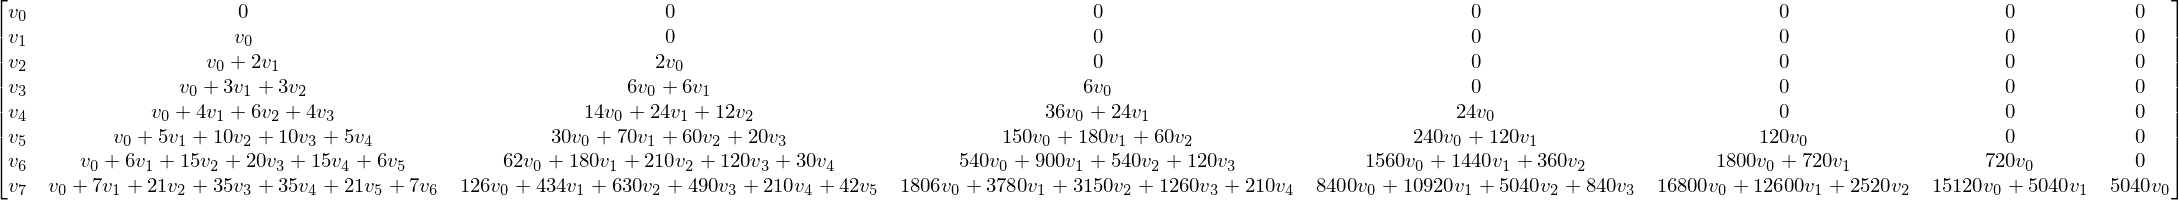

In [76]:
X_1 = GEs[1].rhs
X_1

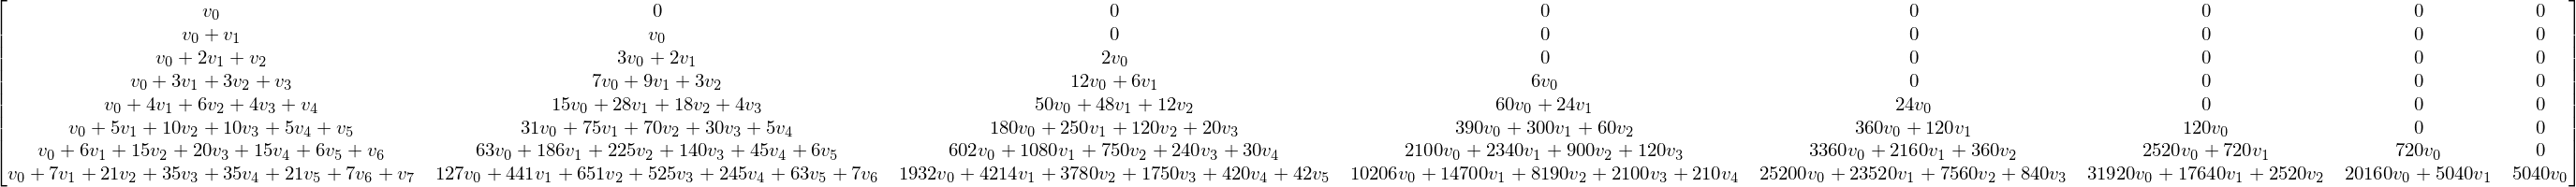

In [82]:
LHS = P * X_1
LHS

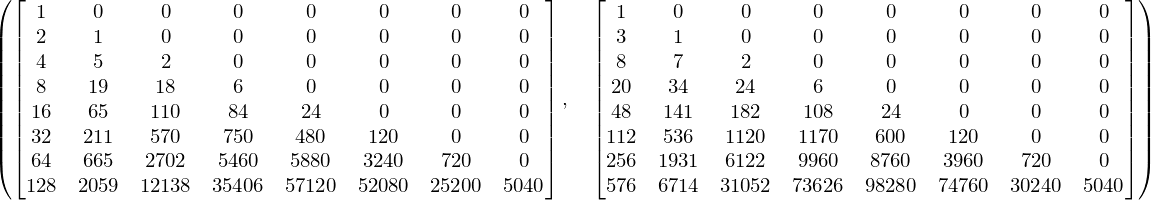

In [95]:
L = Lambda(v_vector, LHS)
L(*ones(m, 1)), L(*range(1, m+1))

In [80]:
J_1 = (X_1**(-1) * P * X_1).applyfunc(simplify)

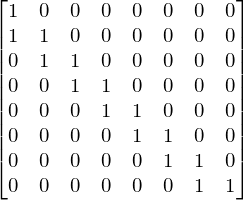

In [81]:
J_1

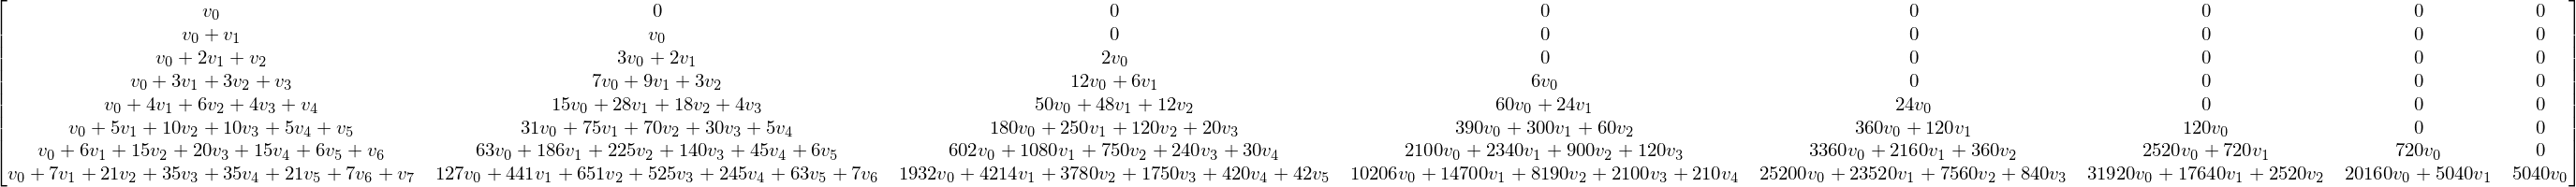

In [106]:
X_1 * J_1

## `inverse` function

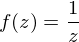

In [10]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

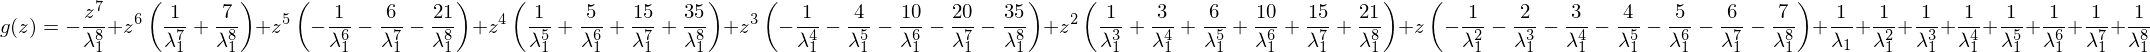

In [11]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [12]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

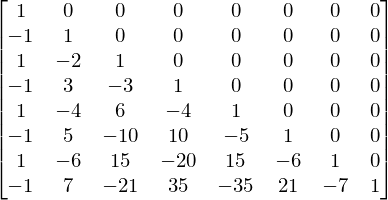

In [13]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    P_inverse = g_inverse(P)
P_inverse

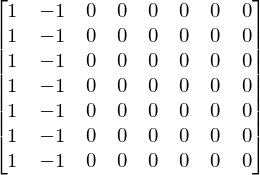

In [14]:
Asequence(P_inverse)

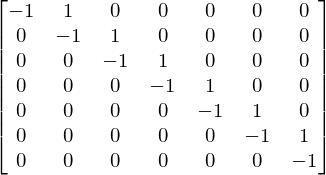

In [15]:
production_matrix(P_inverse)

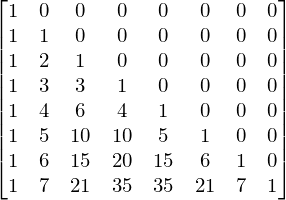

In [16]:
g_inverse(P_inverse)

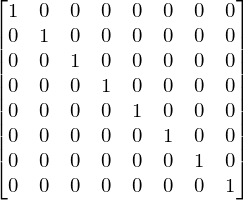

In [19]:
(P_inverse * P).doit()

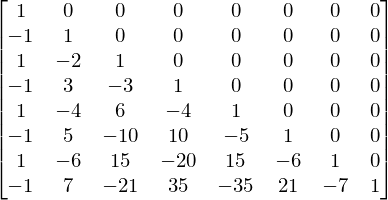

In [22]:
(P**(-1)).doit()

## `power` function

In [23]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

In [24]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
#g_power

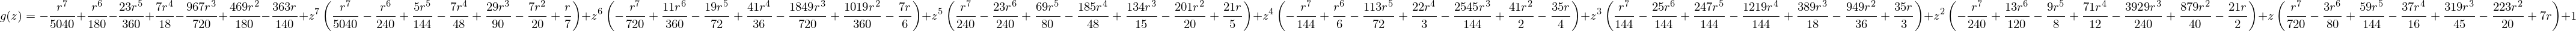

In [25]:
g_power = g_power.subs(eigenvals)
g_power

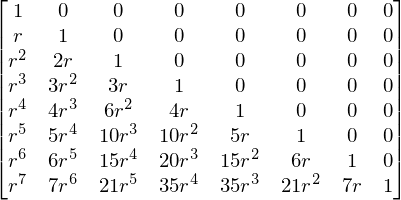

In [26]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(P)
m_power

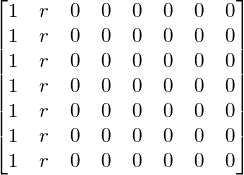

In [27]:
Asequence(m_power)

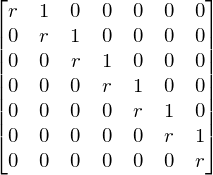

In [29]:
production_matrix(m_power)

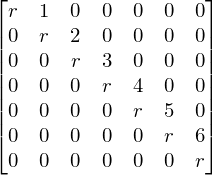

In [32]:
production_matrix(m_power, exp=True)

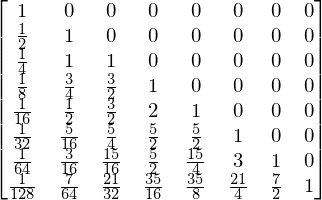

In [30]:
m_power.subs({r:S(1)/2})

In [31]:
(P**r).applyfunc(simplify)

KeyboardInterrupt: 

## `sqrt` function

In [33]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

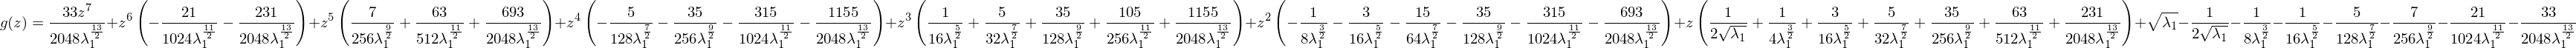

In [34]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

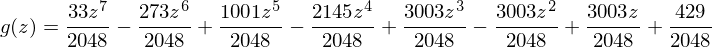

In [35]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

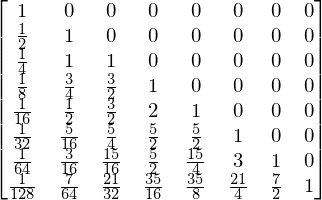

In [36]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(P)
m_sqrt

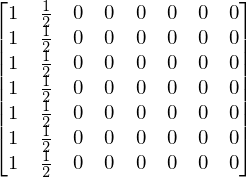

In [37]:
Asequence(m_sqrt)

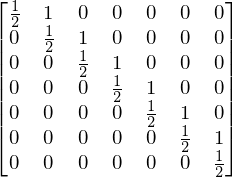

In [38]:
production_matrix(m_sqrt)

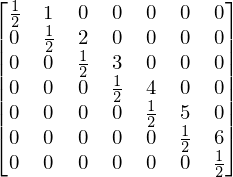

In [39]:
production_matrix(m_sqrt, exp=True)

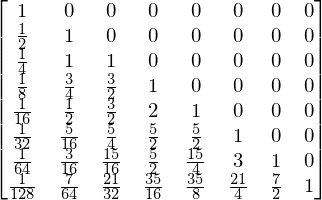

In [30]:
P**(S(1)/2)

## `expt` function

In [40]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

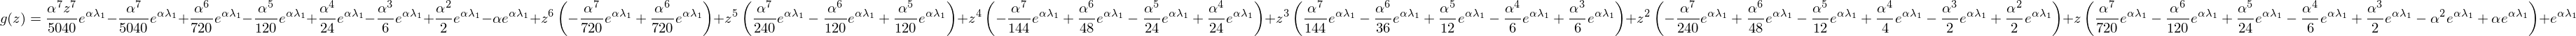

In [41]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

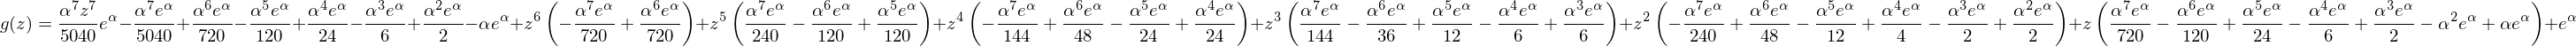

In [42]:
g_expt = g_expt.subs(eigenvals)
g_expt

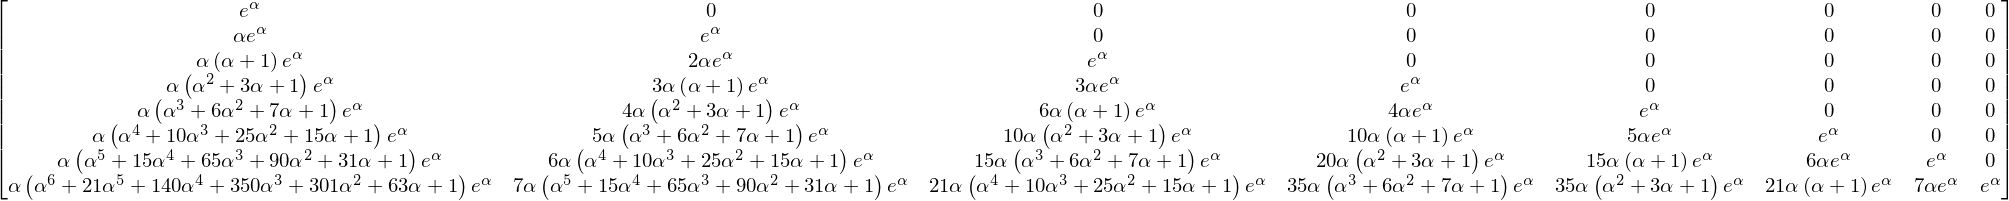

In [43]:
with lift_to_matrix_function(g_expt) as g_expt:
    P_expt = g_expt(P)
P_expt

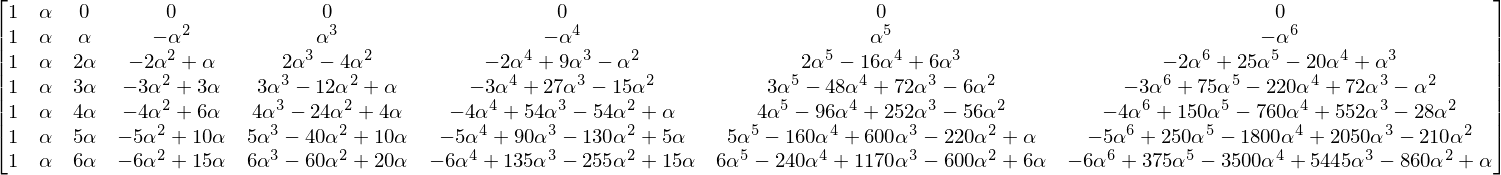

In [44]:
Asequence(P_expt)

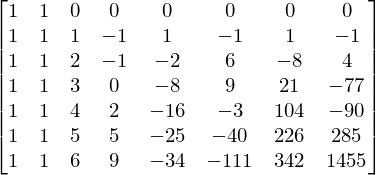

In [45]:
_.subs({alpha:1})

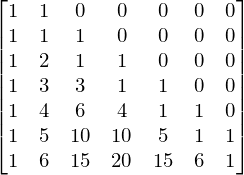

In [48]:
production_matrix(P_expt).subs({alpha:1})

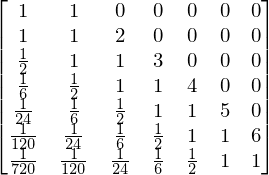

In [49]:
production_matrix(P_expt, exp=True).subs({alpha:1})

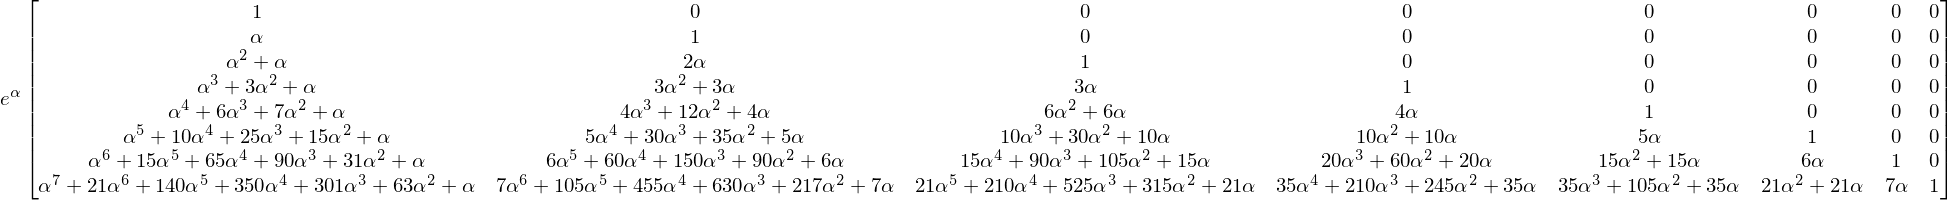

In [50]:
simp_P_expt = Mul(exp(alpha), P_expt.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

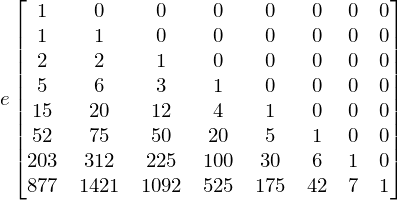

In [51]:
simp_P_expt.subs({alpha:1})

In [52]:
from sympy.functions.combinatorial.numbers import stirling

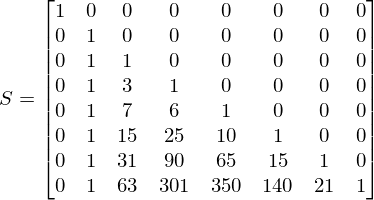

In [53]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
Eq(Symbol('S'), S, evaluate=False)

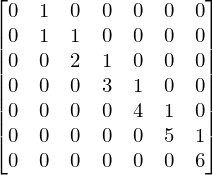

In [54]:
production_matrix(S)

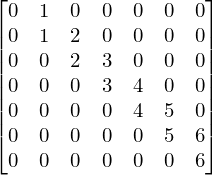

In [55]:
production_matrix(S, exp=True)

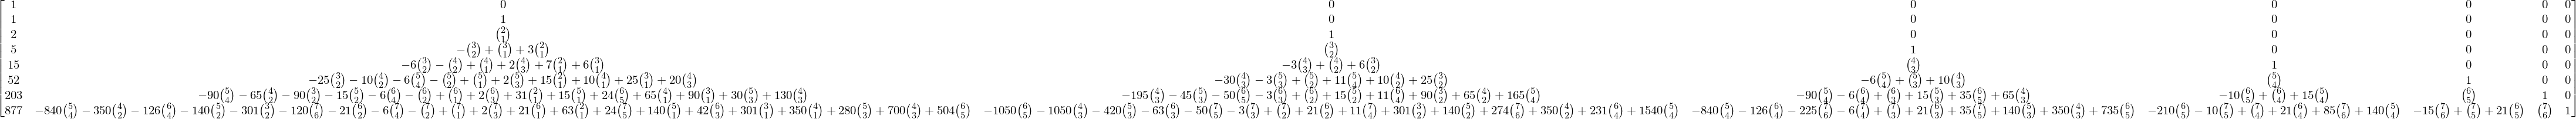

In [56]:
S*P*S**(-1)

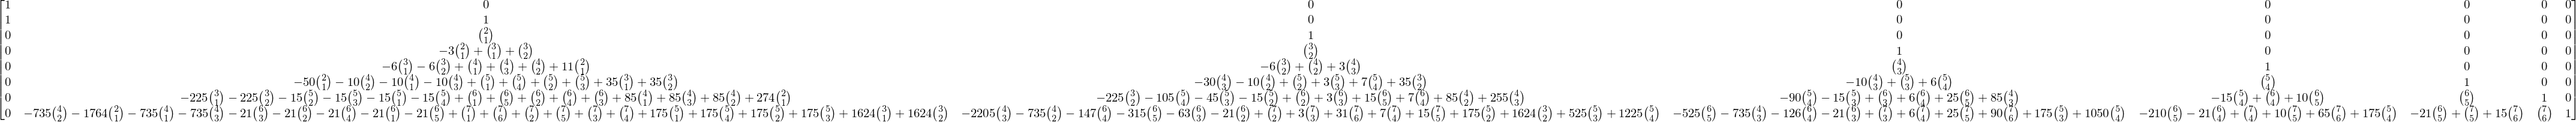

In [57]:
S**(-1)*P*S

### Exercise 5.6

In [8]:
d = IndexedBase('d')
h = IndexedBase('h')

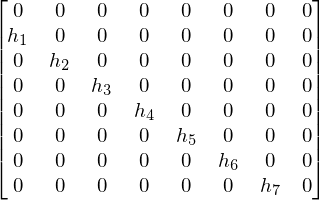

In [9]:
H = Matrix(m, m, lambda n, k: h[n] if n==k+1 else 0 if n == k-1 else 0)
H

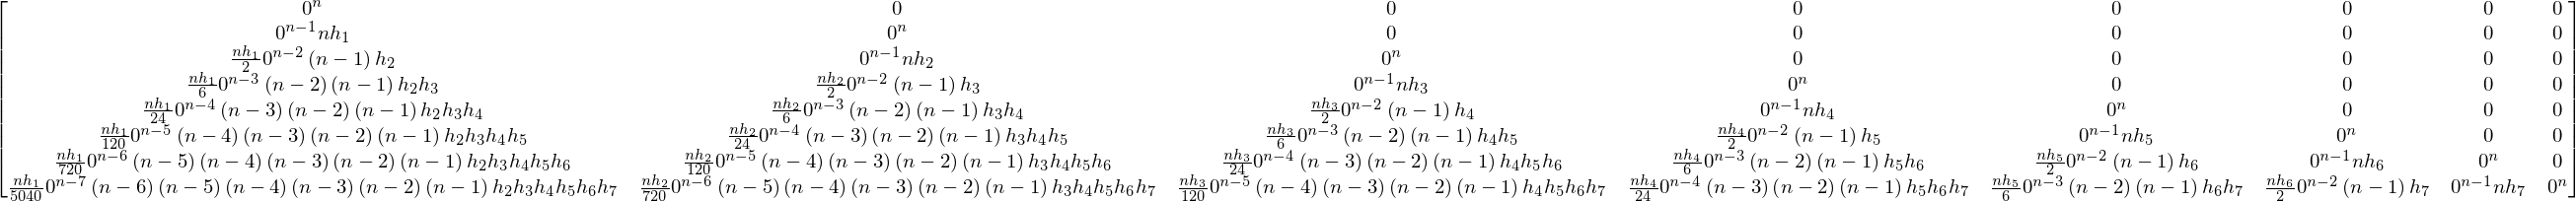

In [23]:
H**n

In [25]:
unit = Matrix(m, 1, unit_vector(3, offset=0))
unit

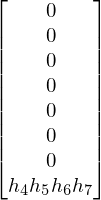

In [22]:
H**4*unit

In [58]:
f = Function('f')
alpha, beta, gamma = symbols(r'\alpha \beta \gamma')
f_expt = define(let=f(z), be=exp((alpha+beta)*z))
f_expt

In [59]:
data, eigenvals, multiplicities = eigendata = eigen_data(H)
eigendata

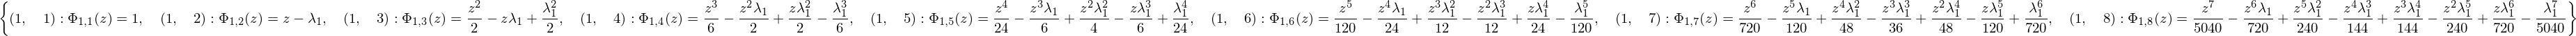

In [60]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

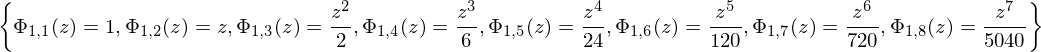

In [61]:
{poly_def.subs(eigenvals) for (i,j), poly_def in Phi_polynomials.items()}

In [62]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
#g_expt

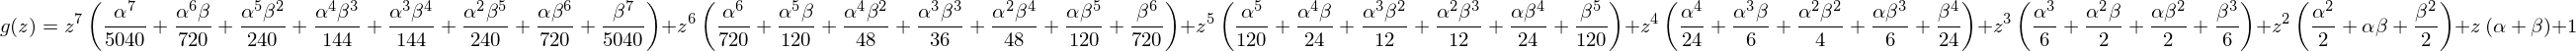

In [63]:
g_expt = g_expt.subs(eigenvals)
g_expt

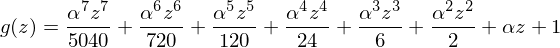

In [64]:
g_expt.subs({beta:0})

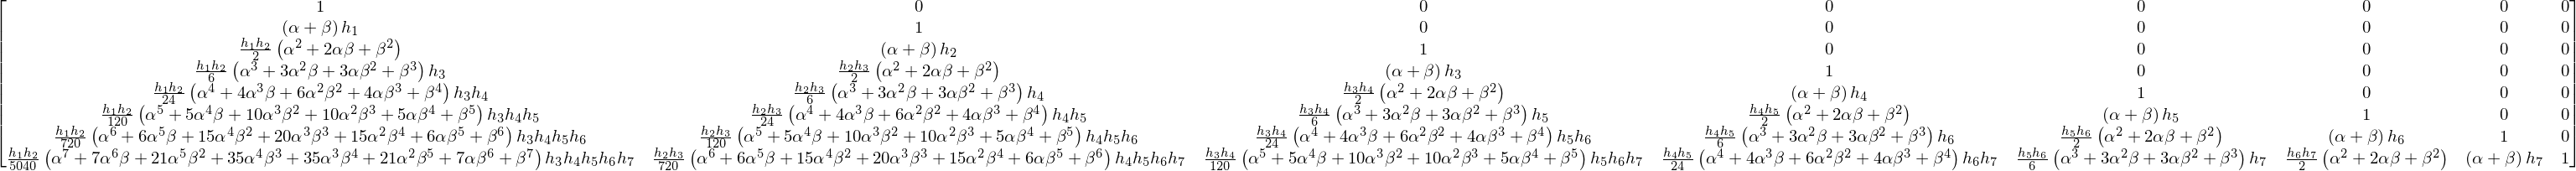

In [65]:
with lift_to_matrix_function(g_expt) as g_expt:
    H_expt = g_expt(H)
H_expt

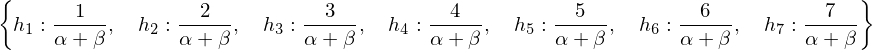

In [66]:
constraints = [Eq(H_expt[n,k],P[n,k]) for n in range(m) for k in range(n)]
sol, *rest = solve(constraints,  [h[i] for i in range(1,m)], dict=True)
sol

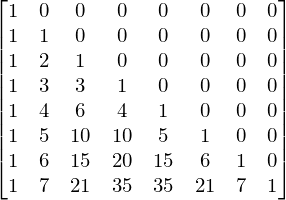

In [68]:
H_expt.subs(sol).applyfunc(simplify)

In [24]:
{i:factorial(i, ) for i in range(11)}

## `log` function

In [46]:
f = Function('f')
f_log = define(let=f(z), be=log(z))
f_log

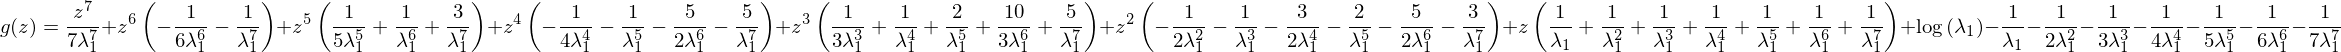

In [47]:
g_log = g_poly(f_log, eigendata, Phi_polynomials)
g_log

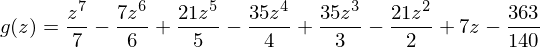

In [48]:
g_log = g_log.subs(eigenvals)
g_log

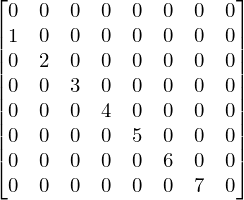

In [49]:
with lift_to_matrix_function(g_log) as g_log:
    P_log = g_log(P)
P_log

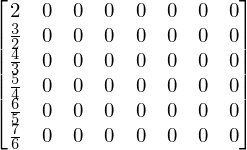

In [51]:
Asequence(P_log[1:,:])

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.